<a href="https://colab.research.google.com/github/amayasarasacolina/MineriaL1P1/blob/main/L1P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PILAR ARIAS, YEDRA MARTÍN, PATRICIA MEDIAVILLA, AMAYA SARASA

<GRUPO 9>

#Practica 3

##INTRODUCCIÓN

Esta es la tercera práctica del primer laboratorio. Dada una base de datos en formato .csv, se nos pide contestar a una serie de cuestiones. Para ello, lo primero que debemos hacer es cargar y leer la base de datos:

In [3]:
#Importamos las librerías y la base de datos necesarias

import numpy as np #numpy
import pandas as pd #pandas
import sklearn as sk #scikit-learn
import matplotlib.pyplot as plt #gráfica Matplotlib

df = pd.read_csv('pokemon.csv',sep=',')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Pokémon           20 non-null     object
 1   Tipo              20 non-null     object
 2   PS                20 non-null     int64 
 3   Ataque            20 non-null     int64 
 4   Defensa           20 non-null     int64 
 5   Ataque especial   20 non-null     int64 
 6   Defensa especial  20 non-null     int64 
 7   Velocidad         20 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ KB


,Pokémon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,2,3,2,4,2,4
1,PONYTA,Fuego,2,3,2,2,2,3
2,TORKOAL,Fuego,2,3,4,3,2,1
3,ARCANINE,Fuego,3,5,3,4,3,4
4,STARMIE,Agua,2,3,3,4,2,4
5,PALKIA,Agua,3,4,3,5,3,4
6,MILOTIC,Agua,3,2,2,4,3,3
7,AZUMARILL,Agua,3,2,2,2,2,2
8,LEAFEON,Planta,2,4,4,2,2,3
9,ABOMASNOW,Planta,3,3,2,3,2,2


Subimos la base de datos, df.info nos aporta la infomación que contiene la base de datos, vemos las variables, el tipo de las variables con las que trabajamos... y .head vamos a ver que forma tiene la base de datos.

Según se ha estudiado en clase, encontramos dos métodos para afrontarlo. Nos decantaremos por CRISP-DM. Las siglas para: CRoss-Industry Standard Process for Data Mining. 

Es un modelo de proceso de minería de datos que se utiliza en la industria. Es un marco de trabajo que define un proceso estandarizado para llevar a cabo proyectos de minería de datos, desde la definición del problema hasta la implementación y evaluación del resultado.

## Comprensión del negocio y definición del problema.

Esta práctica en concreto consiste en un problema de 7 dimensiones, intentar reducir la dimensionalidad pero quedandonos con la mayor información posible, esto se consigue siguendo un método llamado, Análisis de componentes principales.

Para ello haremos uso de un dataset que se puede encontrar en Moodle.


## Comprensión de los datos

La base de datos que utilizaremos consta de 20 observaciones

Existen 8 tipos de atributos distintos:
- Pokemon:
- Tipo (del pokemon, fuego, agua, planta, eléctrico, fantasma)
- Ps (puntos de salud)
- Ataque
- Defensa
- Ataque especial
- Defensa especial
- Velocidad (del pokemon)

Como hemos explicado en el anterior paso de la motodología CRISP vamos a intentar reducir la dimensiones haciendo combianciones lineales de los 7 atributos.


TENEMOS QUE HACER ESTO: normalizar los datos.

##Preparación de los datos

En esta base de datos, tenemos muy pocas observaciones y 8 atributos, por lo que a simple vista podemosver que no hay valores vacíos, no hay outliers...

De hecho en el enunciado nos especifica que normalicemos los datos con el fin de no tener diferencias de rango para que no haya problemas para procesar la información. 

In [4]:
#Importamos la librería necesaria para normalizar los datos
from sklearn.preprocessing import StandardScaler
#Seleccionamos los datos numéricos para la normalización de estos.
df1 = df[['PS','Ataque','Defensa','Ataque especial','Defensa especial', 'Velocidad']]
scaler = StandardScaler()
df_array= scaler.fit(df1)
df_norm_matriz = scaler.transform(df1)
df_norm = pd.DataFrame(data = df_norm_matriz, columns = ["PS",	"Ataque",	"Defensa",	"Ataque especial",	"Defensa especial",	"Velocidad"])


En la celda de arriba hemos normalizado los datos numéricos de nuestra base de datos, después hemos hecho uso de la herramienta que nos indican para la normalización de estos.

A continuación, 

In [5]:
df_cov = df_norm.cov()
eigenvalues, eigenvectors=np.linalg.eig(df_cov)
#Ordenamos de mayor a menor
eigenvalues = np.sort(eigenvalues)[::-1]
#calculamos el porcentaje de varianza
porcent_var=eigenvalues*100/sum(eigenvalues)
#calculamos el acumulado
porcent_acumulado=np.zeros(len(porcent_var))
porcent_acumulado[0]=porcent_var[0]
for i in range (1,len(porcent_acumulado)):
  porcent_acumulado[i]=porcent_acumulado[i-1]+porcent_var[i]
#creamos un DataFrame con los datos
df2 = pd.DataFrame({'Autovalores': eigenvalues, 'porcent_var': porcent_var,'porcent_acumulado': porcent_acumulado },index=[1,2, 3, 4, 5, 6])
df2

,Autovalores,porcent_var,porcent_acumulado
1,2.629979,41.641341,41.641341
2,1.550661,24.552140,66.193481
3,0.780824,12.363041,78.556522
4,0.715521,11.329090,89.885612
5,0.474598,7.514464,97.400076
6,0.164206,2.599924,100.000000


Con dos componentes obtenemos un 66,19% de la información, por lo que estaríamos perdiendo un 33,8% de la información, algo más de 1/3 del total.

In [6]:
#verifiquemos que la traza de la matriz S (la obtenemos con la función tracede Numpy)
#es igual a la suma de los autovalores, que calculamos en el paso anterior.
sum(eigenvalues)

6.315789473684208

In [7]:
np.trace(df_cov)

6.315789473684211

In [8]:
eigenvalues, eigenvectors=np.linalg.eig(df_cov)
for i in range(len(eigenvalues)):
    if np.allclose(np.dot(df_cov, eigenvectors[:, i]), eigenvalues[i] * eigenvectors[:, i]):
        print("El autovector {} es correcto".format(i+1))
    else:
        print("El autovector {} no es correcto".format(i+1))

El autovector 1 es correcto
El autovector 2 es correcto
El autovector 3 es correcto
El autovector 4 es correcto
El autovector 5 es correcto
El autovector 6 es correcto


In [9]:
#La proporción de variabilidad explicada por cada componente la podemos calcular con: 
prop=eigenvalues/np.trace(df_cov)
prop

array([0.41641341, 0.2455214 , 0.02599924, 0.07514464, 0.1132909 ,
       0.12363041])

In [10]:
#en porcentaje esto sería:
porcentaje=prop*100
porcentaje

array([41.64134115, 24.55213995,  2.59992386,  7.51446419, 11.32908958,
       12.36304127])

Debemos tener en cuenta que los autovectores que obtuvimos están ordenados.
Veamos un gráfico de sedimentación, el cual nos permitirá representar el porcentaje de variación explicado por cada componente o factor en las ordenadas y las componentes en orden decreciente en la abscisas con la finalidad de escoger los factores que retengan más variación.

In [11]:
y=sorted(porcentaje, reverse=True) #almacena los porcentajes de mayor a menor

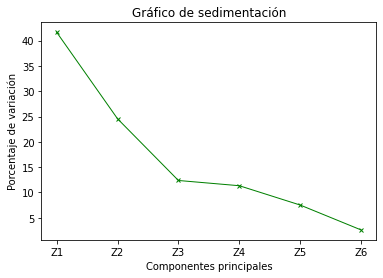

In [12]:
import matplotlib.pyplot as plt
plt.plot(["Z1","Z2","Z3","Z4","Z5", "Z6"], y ,color='green', marker='x', linewidth=1, markersize=4)
plt.title("Gráfico de sedimentación")
plt.xlabel("Componentes principales")
plt.ylabel("Porcentaje de variación")
plt.show()

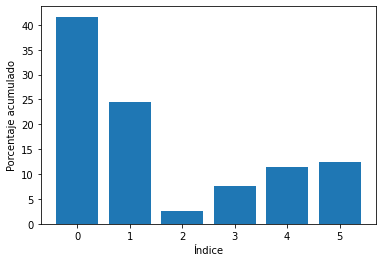

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(range(len(porcentaje)), porcentaje)

ax.set_xlabel('Índice')
ax.set_ylabel('Porcentaje acumulado')

plt.show()

Se puede observar un codo a partir de la tercera componente principal, por lo que retenemos estos componentes. Además lo podemos justificar con el porcentaje acumulado: 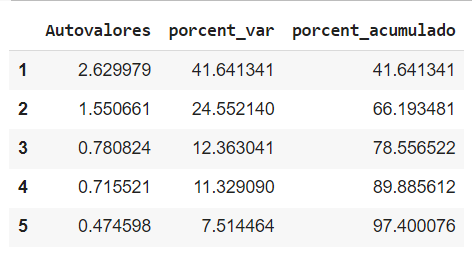

Calularemos su correlación con las variables originales. 

Almacenamos tanto los autovalores como los autovectores en dos variables nuevas para poder operar fácilmente sobre ellos 

In [14]:
eigenvectors

array([[ 0.45454125,  0.15847313,  0.37672419, -0.07820604,  0.78451794,
         0.06908557],
       [ 0.45072878, -0.25198079, -0.491921  ,  0.1067326 , -0.02435867,
         0.69237113],
       [ 0.31882326, -0.63200759,  0.5475605 ,  0.33202671, -0.277256  ,
        -0.10946693],
       [ 0.42331653,  0.38227978, -0.30437481,  0.61163075, -0.07575687,
        -0.4496554 ],
       [ 0.48098891, -0.16852151, -0.23006595, -0.68447289, -0.16380914,
        -0.43815894],
       [ 0.27935701,  0.58087953,  0.41315342, -0.17220602, -0.52392254,
         0.33119957]])

In [15]:
eigenvaluesr=eigenvalues[[5,4,3]]
eigenvaluesr

array([0.78082366, 0.71552145, 0.47459774])

In [16]:
eigenvectorsr=eigenvectors[:,[5,4,3]] #4,3,2 porq tomamos los 3 últimos
eigenvectorsr

array([[ 0.06908557,  0.78451794, -0.07820604],
       [ 0.69237113, -0.02435867,  0.1067326 ],
       [-0.10946693, -0.277256  ,  0.33202671],
       [-0.4496554 , -0.07575687,  0.61163075],
       [-0.43815894, -0.16380914, -0.68447289],
       [ 0.33119957, -0.52392254, -0.17220602]])

In [17]:
df_cov=df_cov.values

In [18]:
a11 = eigenvectors[0,0]
l1 = eigenvalues[0]
s11 = df_cov[0,0]
rx1y1=a11*np.sqrt(l1)/np.sqrt(s11)
rx1y1

0.7184743689297085

In [19]:
from tabulate import tabulate 
rxy=[]
for i in range(len(eigenvalues)):
  for k in range(len(eigenvaluesr)): 
    aki=eigenvectorsr[i,k] 
    lk=eigenvaluesr[k]
    Sii=df_cov[i,i]
    rxiyk=aki*np.sqrt(lk)/np.sqrt(Sii) 
    rxy.append(rxiyk)
print("Correlación entre las variables originales y los componentes extraidos:",'\n','\n', 
      tabulate(np.array(rxy).reshape(len(eigenvalues),len(eigenvaluesr)), ["Comp. 1", "Comp. 2", "Comp.3"], 
               showindex=['X1', 'X2', 'X3', 'X4', 'X5', 'X6']))

Correlación entre las variables originales y los componentes extraidos: 
 
        Comp. 1     Comp. 2      Comp.3
--  ----------  ----------  ----------
X1   0.0595012   0.646809   -0.0525128
X2   0.596317   -0.0200829   0.0716674
X3  -0.0942804  -0.228588    0.222945
X4  -0.387274   -0.062459    0.41069
X5  -0.377372   -0.135055   -0.459601
X6   0.285252   -0.431957   -0.115631


## Ejercicio 3 

Para representar gráficamente los individuos de un dataset utilizando las componentes principales obtenidas, podemos utilizar un diagrama de dispersión de 2 dimensiones. Cada punto en el diagrama representará un individuo del dataset, y las coordenadas del punto serán los valores de las dos primeras componentes principales. 

In [20]:
eigenvalues

array([2.62997944, 1.55066147, 0.16420572, 0.47459774, 0.71552145,
       0.78082366])

Primero calculamos las 2 primeras componentes principales. 

In [21]:
datos=pd.DataFrame(df)

In [22]:
eigenvalues3=eigenvalues[[5,4]]
eigenvalues3

array([0.78082366, 0.71552145])

In [23]:
eigenvectors3=eigenvectors[:,[5,4]] #4,3,2 porq tomamos los 3 últimos
eigenvectors3

array([[ 0.06908557,  0.78451794],
       [ 0.69237113, -0.02435867],
       [-0.10946693, -0.277256  ],
       [-0.4496554 , -0.07575687],
       [-0.43815894, -0.16380914],
       [ 0.33119957, -0.52392254]])

In [24]:
from tabulate import tabulate 
rxy=[]
for i in range(len(eigenvalues)):
  for k in range(len(eigenvalues3)): 
    aki=eigenvectors3[i,k] 
    lk=eigenvalues3[k]
    Sii=df_cov[i,i]
    rxiyk=aki*np.sqrt(lk)/np.sqrt(Sii) 
    rxy.append(rxiyk)
print("Correlación entre las variables originales y los componentes extraidos:",'\n','\n', 
      tabulate(np.array(rxy).reshape(len(eigenvalues),len(eigenvalues3)), ["Comp. 1", "Comp. 2"], 
               showindex=['X1', 'X2', 'X3', 'X4', 'X5', 'X6']))

Correlación entre las variables originales y los componentes extraidos: 
 
        Comp. 1     Comp. 2
--  ----------  ----------
X1   0.0595012   0.646809
X2   0.596317   -0.0200829
X3  -0.0942804  -0.228588
X4  -0.387274   -0.062459
X5  -0.377372   -0.135055
X6   0.285252   -0.431957


In [25]:
#rxy es una lista, es por lo que no funciona
rxy=np.array(rxy)

In [26]:
rxy=np.array(rxy).reshape(len(eigenvalues),len(eigenvalues3))
rxy

array([[ 0.05950119,  0.64680894],
       [ 0.59631706, -0.02008292],
       [-0.09428036, -0.22858835],
       [-0.38727378, -0.06245902],
       [-0.37737225, -0.13505519],
       [ 0.28525157, -0.4319567 ]])

In [27]:
datos=df.values

In [28]:
df_norm

,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,-0.326164,0.054313,-0.75,0.564152,-0.50,1.037975
1,-0.326164,0.054313,-0.75,-1.171700,-0.50,0.135388
2,-0.326164,0.054313,1.75,-0.303774,-0.50,-1.669787
3,0.978492,2.226814,0.50,0.564152,0.75,1.037975
4,-0.326164,0.054313,0.50,0.564152,-0.50,1.037975
5,0.978492,1.140563,0.50,1.432078,0.75,1.037975
6,0.978492,-1.031938,-0.75,0.564152,0.75,0.135388
7,0.978492,-1.031938,-0.75,-1.171700,-0.50,-0.767199
8,-0.326164,1.140563,1.75,-1.171700,-0.50,0.135388
9,0.978492,0.054313,-0.75,-0.303774,-0.50,-0.767199


Vamos a crear los valores a representar, es decir, vamos a calcular los puntos (C1, C2) de cada individuo, de la forma: 

      Individuo 1 C1=0.0595012*X1+0.596317*X2+...+0.285252 *X8
  
      (siendo X1,...,X8 los valores del indivviduo 1)

In [29]:
c1=np.zeros(len(df_norm))
c2=c1

In [30]:
for i in range (len(df_norm)):
  c1[i]=sum((rxy[:,0])*(df_norm.iloc[i]))
  c1[i]=sum((rxy[:,1])*(df_norm.iloc[i]))

In [38]:
c1=c1.reshape(20,1)
c2=c2.reshape(20,1)
df3 = pd.DataFrame([c1,c2])

ValueError: ignored

## Ejercicio 4

In [28]:
rxy

array([[ 0.05950119,  0.64680894],
       [ 0.59631706, -0.02008292],
       [-0.09428036, -0.22858835],
       [-0.38727378, -0.06245902],
       [-0.37737225, -0.13505519],
       [ 0.28525157, -0.4319567 ]])

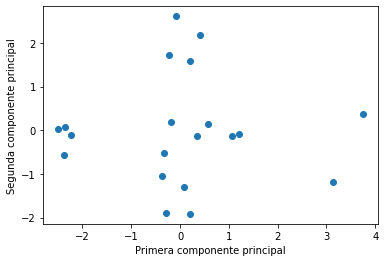

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(df_norm)

# crea un diagrama de dispersión de 2 dimensiones
fig, ax = plt.subplots()
ax.scatter(componentes_principales[:, 0], componentes_principales[:, 1])

# agrega etiquetas a los ejes
ax.set_xlabel('Primera componente principal')
ax.set_ylabel('Segunda componente principal')

# muestra el diagrama de dispersión
plt.show()